## a visualization of an astrophysical simulation

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Read in the density file

In [5]:
fname="density_projection.dat"
d=np.fromfile(fname,dtype=np.float32)
d=np.reshape(d,(512,512))

### Repeat for the energy file

In [7]:
fname="energy_projection.dat"
energy=np.fromfile(fname,dtype=np.float32)
energy=np.reshape(energy, (512,512))

## Let's plot them using the default color map

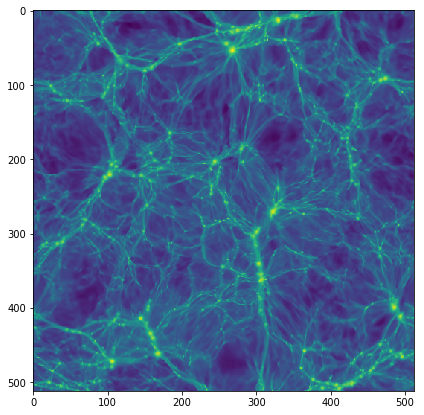

In [11]:
d_log=np.log10(d)
f=plt.figure(figsize=(7,7))
plt.imshow(d_log)

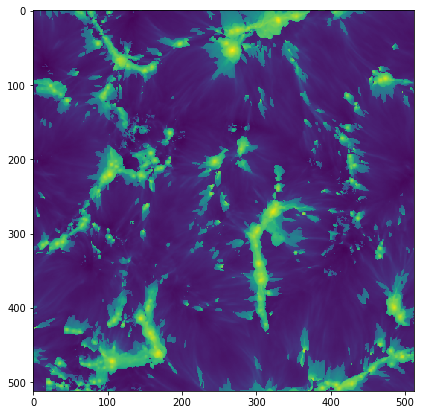

In [12]:
e_log=np.log10(energy)
f=plt.figure(figsize=(7,7))
plt.imshow(e_log)

### Making a 3-color image
We can combine the density and energy maps into a three color image using the HSV color space. Here H=[0,1] corresponds to the color wheel going from red-> red through yellow, green, bluee and purple. V=[0,1] is the intensity of the image. S=[0,1] is the saturation of the color, with 0 being white for V=1 or black V=0 and 1 being a deep color

We will map density to V and S and energy to H

In [14]:
d_min=d_log.min()
d_max=d_log.max()

v=(d_log-d_min)/(d_max-d_min)
s=1.0-v

In [46]:
e_min=e_log.min()
e_max=e_log.max()

h=1-.8*(e_log-e_min)/(e_max-e_min)

In [47]:
### Now we have to make a HSV image and then convert to RGB

In [48]:
hsv_image=np.zeros((512,512,3))

hsv_image[:,:,0]=h
hsv_image[:,:,1]=s
hsv_image[:,:,2]=v

rgb_image=colors.hsv_to_rgb(hsv_image)

## Show image

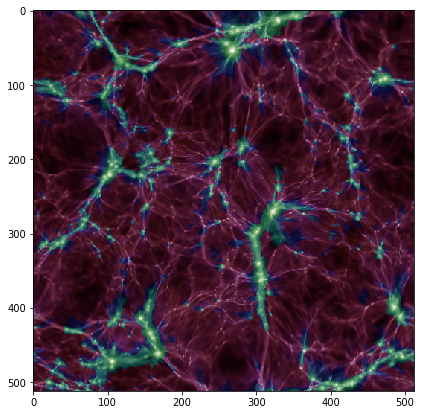

In [49]:
f=plt.figure(figsize=(7,7))
plt.imshow(rgb_image)

In [22]:
plt.imsave("test.png",rgb_image)